## MODELOS DE CLUSTERING CON DATOS DE MPG    PENDIENTE!!!!!!

In [1]:
import pandas as pd
import numpy as np

In [13]:
df_mpg = pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\MisModelos\datos_visualizacion_mpg.csv')

In [14]:
df_mpg.shape

(398, 9)

In [15]:
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
125,20.0,6,198.0,95.0,3102,16.5,74,usa,plymouth duster
74,13.0,8,302.0,140.0,4294,16.0,72,usa,ford gran torino (sw)
22,25.0,4,104.0,95.0,2375,17.5,70,europe,saab 99e
166,13.0,8,302.0,129.0,3169,12.0,75,usa,ford mustang ii
72,15.0,8,304.0,150.0,3892,12.5,72,usa,amc matador (sw)


#### Voy a tratar la columna Name para separar la MARCA del nombre con la intencion de hacer una clasificacion de este dato 

In [16]:
df_mpg['marca']=df_mpg['name'].apply(lambda x: x[0:x.index(' ')].upper() if ' ' in x else x.upper())
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca
275,17.0,6,163.0,125.0,3140,13.6,78,europe,volvo 264gl,VOLVO
22,25.0,4,104.0,95.0,2375,17.5,70,europe,saab 99e,SAAB
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,PLYMOUTH
38,14.0,8,350.0,165.0,4209,12.0,71,usa,chevrolet impala,CHEVROLET
350,34.7,4,105.0,63.0,2215,14.9,81,usa,plymouth horizon 4,PLYMOUTH


In [17]:
df_mpg['marca'].unique() 

array(['CHEVROLET', 'BUICK', 'PLYMOUTH', 'AMC', 'FORD', 'PONTIAC',
       'DODGE', 'TOYOTA', 'DATSUN', 'VOLKSWAGEN', 'PEUGEOT', 'AUDI',
       'SAAB', 'BMW', 'CHEVY', 'HI', 'MERCURY', 'OPEL', 'FIAT',
       'OLDSMOBILE', 'CHRYSLER', 'MAZDA', 'VOLVO', 'RENAULT', 'TOYOUTA',
       'MAXDA', 'HONDA', 'SUBARU', 'CHEVROELT', 'CAPRI', 'VW',
       'MERCEDES-BENZ', 'CADILLAC', 'MERCEDES', 'VOKSWAGEN', 'TRIUMPH',
       'NISSAN'], dtype=object)

 En esta lista hay errores de tipeo. Hay que transformar para corregirlos.
 
 Unificar las siguientes categorias de marca:
 
        TOYOTA, TOYOUTA
        VOLKSWAGEN, VW, VOKSWAGEN
        MERCEDES-BENZ, MERCEDES
        CHEVROLET, CHEVROELT

In [18]:
df_mpg[df_mpg['marca']=='VOKSWAGEN']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marca
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit,VOKSWAGEN


In [19]:
# indice de fila a modificar
df_mpg[df_mpg['marca']=='MERCEDES'].index

Int64Index([297], dtype='int64')

In [20]:
df_mpg.iloc[df_mpg[df_mpg['marca']=='VOKSWAGEN'].index,9]='VOLKSWAGEN'
df_mpg.iloc[df_mpg[df_mpg['marca']=='VW'].index,9]='VOLKSWAGEN'
df_mpg.iloc[df_mpg[df_mpg['marca']=='TOYOUTA'].index,9]='TOYOTA'

In [21]:
df_mpg.iloc[df_mpg[df_mpg['marca']=='CHEVROELT'].index,9]='CHEVROLET'

In [22]:
df_mpg.iloc[df_mpg[df_mpg['marca']=='MAXDA'].index,9]='MAZDA'

<AxesSubplot:>

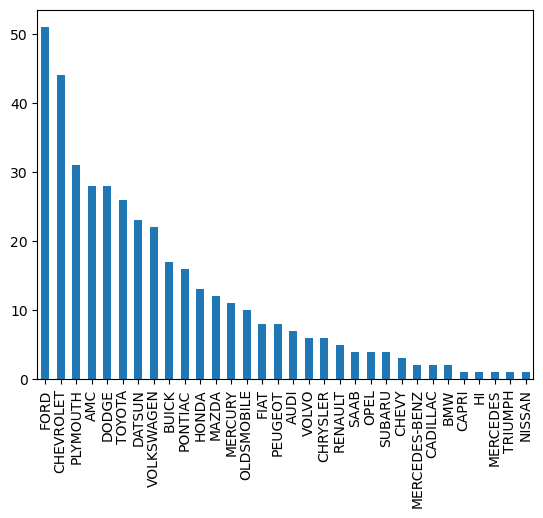

In [23]:
df_mpg['marca'].value_counts().sort_values(ascending=False).plot.bar()


In [27]:
# vuelvo a controlar
# df_mpg['marca'].unique().size # son 32
df_mpg['marca'].unique().reshape(32,1)#.sort()

array([['CHEVROLET'],
       ['BUICK'],
       ['PLYMOUTH'],
       ['AMC'],
       ['FORD'],
       ['PONTIAC'],
       ['DODGE'],
       ['TOYOTA'],
       ['DATSUN'],
       ['VOLKSWAGEN'],
       ['PEUGEOT'],
       ['AUDI'],
       ['SAAB'],
       ['BMW'],
       ['CHEVY'],
       ['HI'],
       ['MERCURY'],
       ['OPEL'],
       ['FIAT'],
       ['OLDSMOBILE'],
       ['CHRYSLER'],
       ['MAZDA'],
       ['VOLVO'],
       ['RENAULT'],
       ['HONDA'],
       ['SUBARU'],
       ['CAPRI'],
       ['MERCEDES-BENZ'],
       ['CADILLAC'],
       ['MERCEDES'],
       ['TRIUMPH'],
       ['NISSAN']], dtype=object)

In [30]:
import seaborn as sns

In [31]:
iris = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
86,6.7,3.1,4.7,1.5,versicolor
39,5.1,3.4,1.5,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
115,6.4,3.2,5.3,2.3,virginica
